## 一、导入需要的库

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt      
%matplotlib inline
import seaborn as sns
plt.rcParams['font.sans-serif'] = ['SimHei']     # 设置中文显示
plt.rcParams['axes.unicode_minus'] = False    # 解决图片显示为负号'-'显示为方块的问题
plt.rcParams['savefig.dpi'] = 300     # 设定图片像素

import warnings             
warnings.filterwarnings("ignore")

In [2]:
from sklearn.model_selection import train_test_split    # 导入测试集划分模块
from sklearn.model_selection import cross_val_score     # 导入交叉验证模块

In [3]:
from sklearn.metrics import classification_report      # 导入分类报告模块
from sklearn.metrics import confusion_matrix          # 导入混淆矩阵模块

## 二、数据预处理

### 1.导入数据

In [4]:
diabetes = pd.read_csv(r"F:\kaidian\diabetes.csv",encoding='gbk')    #导入数据，读取CSV数据
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


#### 数据含义解释：

Pregnancies:怀孕次数

Glucose:口服葡萄糖耐量试验中血浆葡萄糖浓度

BloodPressure:血压（mm/Hg）

SkinThickness:皮脂厚度（mm）

Insulin:2小时血清胰岛素（μU/ml）

BMI:体重指数（kg/（身高(m)）^ 2）

DiabetesPedigreeFunction:糖尿病谱系功能

Age:年龄（岁）

Outcome:是否患病(1/0)

### 2.观察数据信息

In [5]:
diabetes.info()    # 查看数据集的有关信息
print(diabetes.shape)    #数据维度

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
(768, 9)


In [6]:
diabetes.describe()     # 数据的描述性统计概况

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
num = diabetes['Outcome'].value_counts()     # 查看标签（是否患病）
num

0    500
1    268
Name: Outcome, dtype: int64

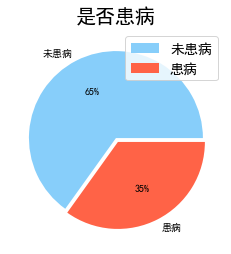

In [8]:
'''
对是否患病的人数进行可视化，
'''
plt.figure(figsize=(4, 4))
plt.pie(num, labels=['未患病', '患病'], autopct='%.00f%%', explode=(0, 0.05),
       colors=['lightskyblue', 'tomato'])
plt.legend(loc='upper right',fontsize=14)    #显示图例
plt.title('是否患病',size=20)
plt.show()

### 3.处理缺失值

####  首先把数据分为两类：一类患病，一类不患病，然后，处理缺失值，把患病的缺失值用该类中的平均值代替，把不患病的缺失值用不患病类中的平均值代替。最后把两类合并得出处理后的数据。

In [9]:
diabetes0 = diabetes[diabetes['Outcome'] < 1]    #取结果不患病的数据
diabetes1 =diabetes[diabetes['Outcome'] > 0]
for attribute in diabetes0.columns[1:6]:    #对缺失值进行均值插值处理
    for i in diabetes0.index:
        if diabetes0[attribute][i] == 0:
            diabetes0[attribute][i] = np.mean(diabetes0[attribute])
for attribute in diabetes1.columns[1:6]:
    for i in diabetes1.index:
        if diabetes1[attribute][i] == 0:
            diabetes1[attribute][i] = np.mean(diabetes1[attribute])

In [10]:
diabetes = pd.merge(diabetes0,diabetes1,how = 'outer')    #整合两列数据

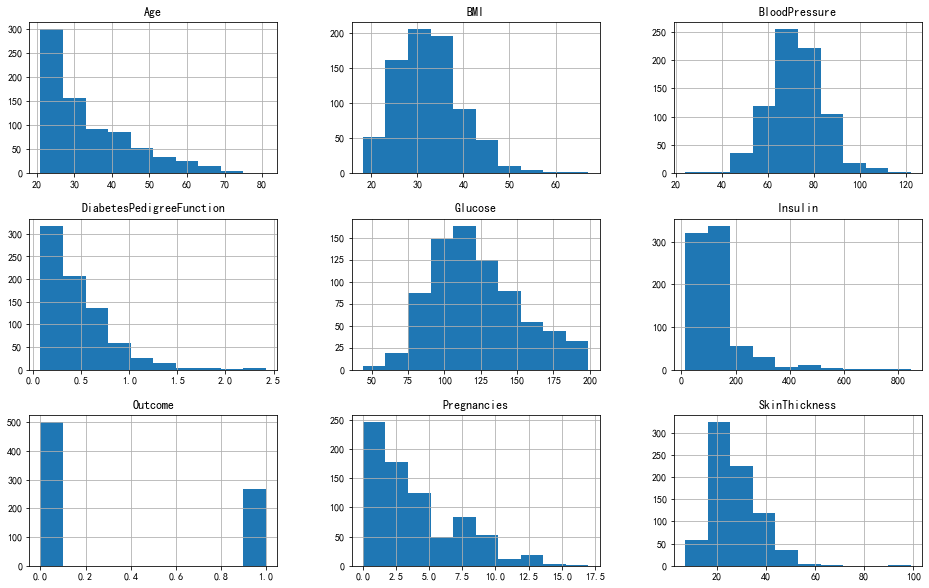

In [11]:
#绘制直方图，大致看出数据分类的平衡程度
diabetes.hist(figsize=(16,10))
plt.show()

### 4.处理异常值

#### 绘制箱线图，可以看出数据存在离群值，进行离群值处理（剔除）。

#### 箱线图异常值定义为小于$Q_1 - 1.5IQR$或大于$Q_3 + 1.5IQR$ $IQR = Q_3 - Q_1$

Pregnancies                    AxesSubplot(0.125,0.657941;0.227941x0.222059)
Glucose                     AxesSubplot(0.398529,0.657941;0.227941x0.222059)
BloodPressure               AxesSubplot(0.672059,0.657941;0.227941x0.222059)
SkinThickness                  AxesSubplot(0.125,0.391471;0.227941x0.222059)
Insulin                     AxesSubplot(0.398529,0.391471;0.227941x0.222059)
BMI                         AxesSubplot(0.672059,0.391471;0.227941x0.222059)
DiabetesPedigreeFunction          AxesSubplot(0.125,0.125;0.227941x0.222059)
Age                            AxesSubplot(0.398529,0.125;0.227941x0.222059)
Outcome                        AxesSubplot(0.672059,0.125;0.227941x0.222059)
dtype: object

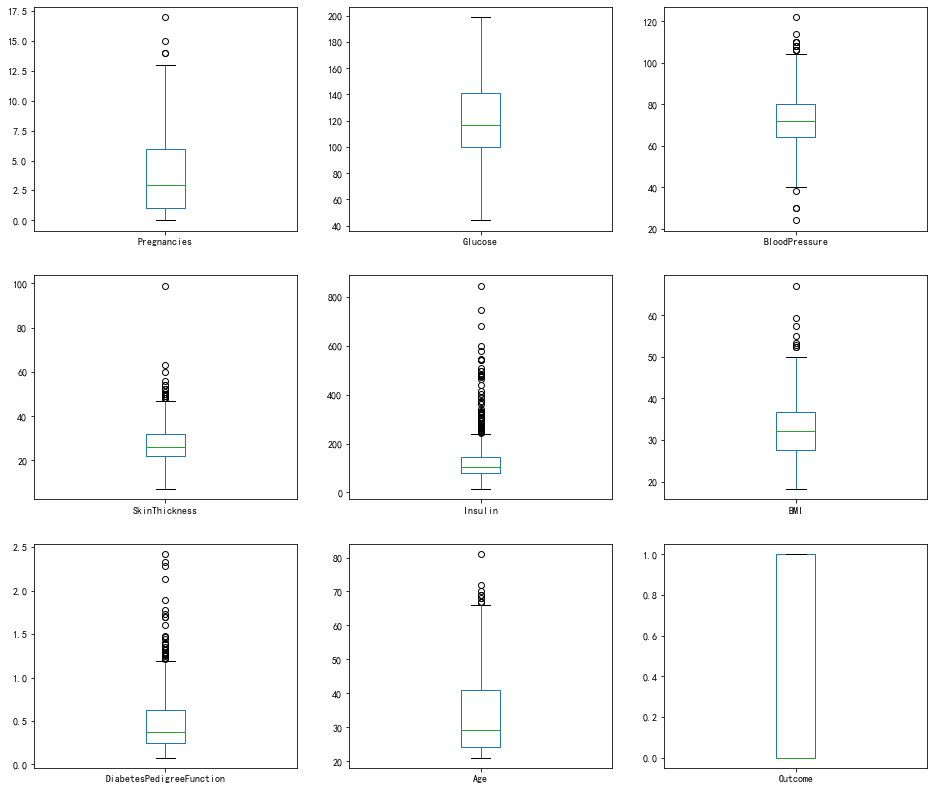

In [12]:
diabetes.plot(kind='box', subplots=True, layout=(3,3), sharex=False,sharey=False, figsize=(16,14))

In [13]:
for attribute in diabetes.columns[1:7]:    #找出离群值，进行剔除
    first_quartile = diabetes[attribute].describe()['25%']    #下四分位数
    third_quartile = diabetes[attribute].describe()['75%']    #上四分位数
    iqr = third_quartile - first_quartile

    diabetes = diabetes[(diabetes[attribute] > (first_quartile - 3 * iqr)) &
           (diabetes[attribute] < (third_quartile + 3 * iqr))]
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,737.000000,737.000000,737.000000,737.000000,737.000000,737.000000,737.000000,737.000000,737.000000
mean,3.888738,119.987788,72.352782,27.085482,117.538670,32.210646,0.458902,33.215739,0.336499
std,3.381712,29.552479,12.019022,8.706695,56.741466,6.669836,0.298616,11.725848,0.472833
min,0.000000,44.000000,24.000000,7.000000,15.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,21.000000,80.000000,27.400000,0.241000,24.000000,0.000000
50%,3.000000,115.000000,72.000000,25.000000,104.000000,32.000000,0.368000,29.000000,0.000000
75%,6.000000,138.000000,80.000000,32.000000,140.000000,36.300000,0.612000,41.000000,1.000000
max,17.000000,199.000000,122.000000,60.000000,342.000000,57.300000,1.731000,81.000000,1.000000


### 5.得出最终处理后的数据

In [14]:
x = diabetes.iloc[:,:8]    #x为前八列数据
# y = diabetes.iloc[:,-1:]
# y
y = diabetes.iloc[:,-1]     # 标签变量

### 6.特征重要性评估

#### 从特征变量的相关性矩阵可以看出，每个特征都会对类别变量造成一定影响，所以我们保留全部特征。

In [15]:
corr = diabetes.corr()
corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.163621,0.218519,0.066358,0.077409,0.055788,-0.003510,0.549691,0.237577
Glucose,0.163621,1.000000,0.255473,0.145741,0.454283,0.217603,0.085790,0.281429,0.493274
BloodPressure,0.218519,0.255473,1.000000,0.155685,0.096728,0.276739,0.022497,0.345898,0.184214
SkinThickness,0.066358,0.145741,0.155685,1.000000,0.253513,0.559663,0.087858,0.050298,0.223368
Insulin,0.077409,0.454283,0.096728,0.253513,1.000000,0.268826,0.163718,0.119670,0.381510
BMI,0.055788,0.217603,0.276739,0.559663,0.268826,1.000000,0.108855,0.046848,0.314103
DiabetesPedigreeFunction,-0.003510,0.085790,0.022497,0.087858,0.163718,0.108855,1.000000,0.052678,0.170037
Age,0.549691,0.281429,0.345898,0.050298,0.119670,0.046848,0.052678,1.000000,0.234398
Outcome,0.237577,0.493274,0.184214,0.223368,0.381510,0.314103,0.170037,0.234398,1.000000


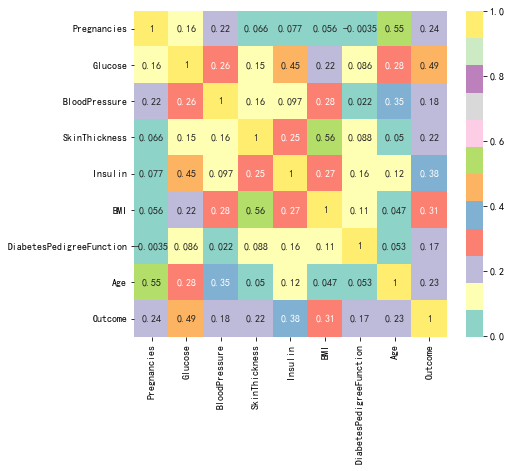

In [16]:
plt.subplots(figsize=(7, 6))
sns.heatmap(corr, annot=True, cmap='Set3')        # 绘制相关系数热力图

### 7.对数据进行标准化处理

#### 本案例使用StandarScaler方法对数据进行标准化处理，消除各个特征之间的量纲

In [17]:
from sklearn import preprocessing    # 导入标准化需要的模块

scaler_x = preprocessing.StandardScaler().fit_transform(x)   # 对所有特征进行标准化
scaler_x[:5]    #标准化后的x

array([[-0.85480379, -1.1847246 , -0.52891955,  0.22003969, -0.87365231,
        -0.84176821, -0.36158635, -0.18909031],
       [-0.85480379, -1.04928024, -0.52891955, -0.46955315, -0.41512244,
        -0.61672241, -0.97818011, -1.04248625],
       [ 0.32883246, -0.13503085,  0.13714403, -0.92928172, -0.87365231,
        -0.99179874, -0.86424431, -0.2744299 ],
       [ 1.80837777, -0.16889194, -0.36240365, -0.92928172, -0.85601655,
         0.46349742, -1.08876486, -0.3597695 ],
       [ 0.0329234 , -0.33819738,  1.63578706, -0.92928172, -0.85601655,
         0.80856765, -0.89775484, -0.2744299 ]])

#### 数据降维与可视化，为了将不同类别的样本数据在一张二维图中显示出来，可以利用主成分分析进行降维，使得8个特征变为2个特征并在二维图上展示出来。

Text(0.5, 1.0, 'Principal Analysis')

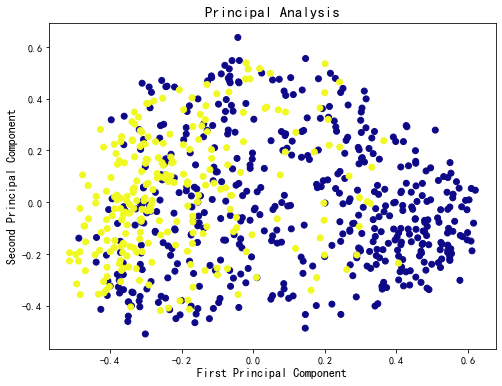

In [18]:
# 在对数据进行标准化之后，利用主成分分析进行降维可视化
from sklearn.decomposition import KernelPCA      # 导入主成分降维模块

kpca = KernelPCA(n_components=2, kernel='rbf')
X_pca = kpca.fit_transform(scaler_x) 
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0],X_pca[:,1],c = y,cmap='plasma')
plt.xlabel("First Principal Component", size=12)
plt.ylabel("Second Principal Component", size=12)
plt.title("Principal Analysis", fontsize=15)

## 三、模型选择与数据分析

In [19]:
#划分数据集
X_train,X_test,Y_train,Y_test = train_test_split(scaler_x,y,test_size=0.3,random_state = 1)  

In [20]:
# 定义含交叉验证的网格搜索函数，用于探索最佳模型参数
from sklearn.model_selection import GridSearchCV

def grid_search(model, param_grid):
    grid_search = GridSearchCV(model, param_grid, cv=5)
    grid_search.fit(X_train, Y_train)
    print(f"Best parameters:{grid_search.best_params_}")
    print("Best cross-validation score:{:.3f}".format(grid_search.best_score_))
    print("Training set score:{:.3f}".format(grid_search.score(X_train, Y_train)))
    print("Test set score:{:.3f}".format(grid_search.score(X_test, Y_test)))

In [21]:
'''
定义一个模型评估函数，给出模型的训练集得分、测试集得分，
并给出模型的误分类个数、混淆矩阵和分类报告。
'''
def model_evaluation(model):
    model = model.fit(X_train,Y_train)  # 模型拟合
    Y_pred = model.predict(X_test)     # 模型在测试集上的预测结果
    
    # 给出该模型在训练集和测试集上的得分
    print(f"训练集的得分为：{model.score(X_train, Y_train)}")
    print(f"测试集的得分为：{model.score(X_test,Y_test)}")
    
    # 给出模型在测试集上的误分类个数
    error_num = (Y_test != Y_pred).sum() 
    print(f"该模型在测试集上的误分类个数为：{error_num}")    # 输出误分类个数
    
    # 该模型在测试集上的混淆矩阵
    plt.figure(figsize=(5, 4))
    confusion = confusion_matrix(Y_test, Y_pred)       
    print("该模型的混淆矩阵为:\n{}".format(confusion))    # 输出混淆矩阵
    sns.set(font_scale=2)
    sns.heatmap(confusion, square=True, annot=True, cmap='Set3')    # 用seaborn绘制混淆矩阵的热力图
    plt.title("Confusion Matrix", size=18)        # 添加标题
    plt.xlabel('Predicted value', size=15)       # 添加x轴副标题
    plt.ylabel('True value', size=15)        # 添加y轴副标题
    plt.show()
    print(f"该模型的分类报告为:\n{classification_report(Y_test, Y_pred)}")    # 输出分类报告

### 1.决策树

#### 决策树主要考虑的便是树的层数即深度，若不限制树的深度，树的深度很大导致叶子节点都是纯的，足以让记住训练数据的所有标签，出现过拟合的情况，泛化能力不佳，因此需要采取剪枝操作，可以设置max_depth，默认是None，即自动扩大到纯节点。

#### 1.1 学习曲线模拟

交叉验证的最大得分为:0.7978488692774407，最大得分的参数为:5


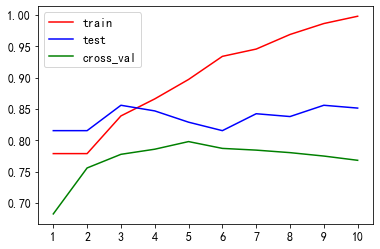

In [22]:
from sklearn.tree import DecisionTreeClassifier   # 导入决策树的库

tr = []; te = []; cv = []    # 创建三个列表用于存储训练集、测试集和交叉验证集得分
for i in range(10):      # 选择不同的深度，绘制学习曲线
    clf = DecisionTreeClassifier(random_state=25,
                                 max_depth = i+1,
                                 criterion='entropy')
    clf = clf.fit(X_train,Y_train)
    score_tr = clf.score(X_train,Y_train)      # 训练集得分
    score_te = clf.score(X_test, Y_test)       # 测试集得分
    score_cv = cross_val_score(clf,scaler_x,y,cv=5).mean()     # 交叉验证集得分
    tr.append(score_tr)
    te.append(score_te)
    cv.append(score_cv)

print(f"交叉验证的最大得分为:{max(cv)}，最大得分的参数为:{np.argmax(cv)+1}")

# 画出模型在训练集、测试集和交叉验证集上的得分曲线
plt.figure(figsize=(6,4))
plt.plot(range(1,11),tr,color='red',label='train')
plt.plot(range(1,11),te,color='blue',label='test')
plt.plot(range(1,11),cv,color='green',label='cross_val')
plt.xticks(range(1,11), size=12)
plt.yticks(size=12)
plt.legend(fontsize=12)
plt.show()

####  从学习曲线中可以发现当max_depth超过6，交叉验证集和测试集得分开始下降，训练集得分快速上升，趋向过拟合，所以后续网格搜索可以将搜索范围控制在1-8之间。

#### 1.2 网格搜索寻找较优参数

In [23]:
'''
利用网格搜索函数寻找一个较优模型，
此处设置criterion、splitter、max_depth、min_samples_leaf四个参数，
其中criterion是特征选择方法，
max_depth是树的最大深度，splitter是切分点方法，
min_samples_leaf是叶子节点最少的样本数。
'''
param_grid = {'criterion':('gini','entropy')
             ,'splitter':('best','random')
             ,'max_depth':np.arange(1, 8)
             ,'min_samples_leaf':np.arange(1, 5)
             }

dt = DecisionTreeClassifier(random_state=0)    #决策树分类
grid_search(dt, param_grid)    #网格搜索

Best parameters:{'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 2, 'splitter': 'best'}
Best cross-validation score:0.833
Training set score:0.938
Test set score:0.838


#### 1.3 评估搜索到的较优模型

训练集的得分为：0.9378640776699029
测试集的得分为：0.8378378378378378
该模型在测试集上的误分类个数为：36
该模型的混淆矩阵为:
[[138   9]
 [ 27  48]]


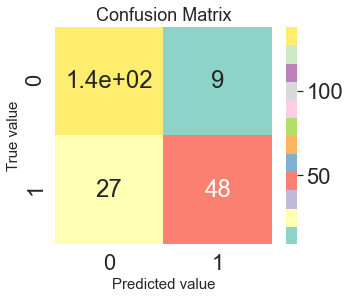

该模型的分类报告为:
              precision    recall  f1-score   support

           0       0.84      0.94      0.88       147
           1       0.84      0.64      0.73        75

    accuracy                           0.84       222
   macro avg       0.84      0.79      0.81       222
weighted avg       0.84      0.84      0.83       222



In [24]:
'''
由网格可知，当criterion选择entropy指数，max_depth=7，splitter选择best，min_samples_leaf为2时，
交叉验证得分最高，所以在这种参数设置下评估模型的预测效果。
'''
dt = DecisionTreeClassifier(criterion='entropy', max_depth=7, splitter='best',
                             min_samples_leaf=2, random_state=0)
model_evaluation(dt)

#### 分析：网格搜索到的较优决策树模型为DecisionTreeClassifier(criterion='entropy', max_depth = 7,splitter='best',min_samples_leaf=2)，误判个数为36个，在训练集上的得分为0.84，在测试集上的得分为0.84，泛化能力较好。从测试报告中可知，准确率为0.84，预测不患病的f1_score为0.88，预测患病的f1_score为0.73，预测患病的错误率较高。

### 2. 支持向量机

#### 2.1 学习曲线模拟

#### SVM的模型有两个重要的参数：一个是正则化参数C，限制了每个样本点的重要性，即对误差的容忍度，C越高，说明越不能容忍出现误差,容易过拟合，C越小，容易欠拟合，因此C过大或过小，泛化能力变差；另一个是gamma，用于控制核的宽度，决定点与点之间“靠近”是指多大的距离，gamma越大，支持向量越少，就是通常说的过拟合；gamma值越小，支持向量越多，则会造成平滑效应太大，无法在训练集上得到特别高的准确率，也会影响测试集的准确率。

交叉验证的最大得分为:0.8210240853097996，最大得分的参数为:4


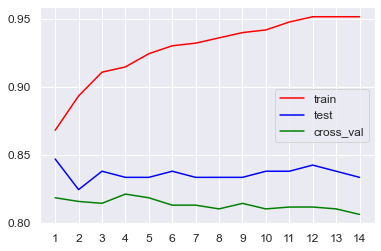

In [25]:
from sklearn.svm import SVC    # 导入支持向量机的模块

tr = []; te = []; cv = []
for i in range(1,15):     # 选择不同的C参数，绘制学习曲线
    model = SVC(C=i)
    svm = model.fit(X_train, Y_train)
    score_tr = svm.score(X_train,Y_train)
    score_te = svm.score(X_test, Y_test)
    score_cv = cross_val_score(svm,scaler_x,y,cv=5).mean()
    tr.append(score_tr)
    te.append(score_te)
    cv.append(score_cv)
print(f"交叉验证的最大得分为:{max(cv)}，最大得分的参数为:{np.argmax(cv)+1}")
plt.plot(range(1,15),tr,color='red',label='train')
plt.plot(range(1,15),te,color='blue',label='test')
plt.plot(range(1,15),cv,color='green',label='cross_val')
plt.xticks(range(1,15), size=12)
plt.yticks(size=12)
plt.legend(fontsize=12)
plt.show()

#### 从图中可知当选择不同的C参数时，交叉验证集的得分和测试集的得分变化不大，但是当C超过10，模型在训练集上的得分越来越大，可能会趋于过拟合，所以在后续网格搜索时，可以把C参数设置在1-10之间。

#### 2.2 网格搜索寻找较优参数

In [26]:
'''
利用网格搜索函数寻找一个较优模型，
此处设置C和gamma这两个参数，
其中C是目标函数的惩罚系数，用来平衡分类间隔margin和错分样本,
gamma是核函数的系数。
'''
param_grid = {'C': range(1, 10),
              'gamma': [0.00001, 0.0001, 0.001, 0.01, 0.05, 0.1, 1, 10]
              }
svm = SVC()
grid_search(svm, param_grid)

Best parameters:{'C': 6, 'gamma': 0.05}
Best cross-validation score:0.831
Training set score:0.876
Test set score:0.820


#### 2.3 评估搜索到的最优模型

训练集的得分为：0.8757281553398059
测试集的得分为：0.8198198198198198
该模型在测试集上的误分类个数为：40
该模型的混淆矩阵为:
[[136  11]
 [ 29  46]]


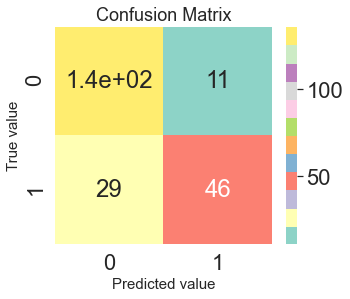

该模型的分类报告为:
              precision    recall  f1-score   support

           0       0.82      0.93      0.87       147
           1       0.81      0.61      0.70        75

    accuracy                           0.82       222
   macro avg       0.82      0.77      0.78       222
weighted avg       0.82      0.82      0.81       222



In [27]:
'''
由学习曲线可知，当C=6，gamma=0.05时，
交叉验证得分最高，所以在这种参数设置下评估模型的预测效果。
'''
svm = SVC(C=6, gamma=0.05)
model_evaluation(svm)

#### 分析：网格搜索到的支持向量机模型为SVC(c=6,gamma=0.05)，误判个数为40个，在训练集上的得分为0.82，在测试集上的得分为0.81，泛化能力较好。从测试报告中可知，准确率为0.82，预测不患病的f1_score为0.87，预测患病的f1_score为0.7，预测患病的错误率较高。

### 3. 朴素贝叶斯

#### 3.1 模型训练

#### 由于朴素贝叶斯模型不需要调参，所以直接用高斯朴素贝叶斯和伯努利朴素贝叶斯训练模型，并评估模型。

训练集的得分为：0.7786407766990291
测试集的得分为：0.7882882882882883
该模型在测试集上的误分类个数为：47
该模型的混淆矩阵为:
[[127  20]
 [ 27  48]]


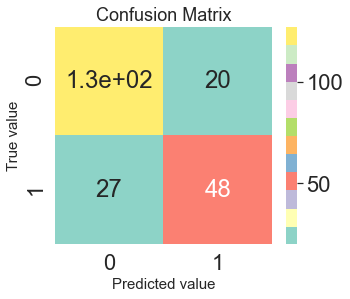

该模型的分类报告为:
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       147
           1       0.71      0.64      0.67        75

    accuracy                           0.79       222
   macro avg       0.77      0.75      0.76       222
weighted avg       0.78      0.79      0.79       222



In [28]:
from sklearn.naive_bayes import GaussianNB      # 导入高斯贝叶斯分类器

gnb = GaussianNB()    # 高斯朴素贝叶斯分类器
model_evaluation(gnb)    # 评估模型

#### 分析：对于高斯朴素贝叶斯模型，误判个数为47个，在训练集上的得分为0.820，在测试集上的得分为0.71，泛化能力较好。从测试报告中可知，准确率为0.79，预测不患病的f1_score为0.83，预测患病的f1_score为0.67，预测患病的错误率较高。

### 4. 逻辑回归

#### 4.1 学习曲线模拟

交叉验证的最大得分为:0.7843077771649201，最大得分的下标为:2


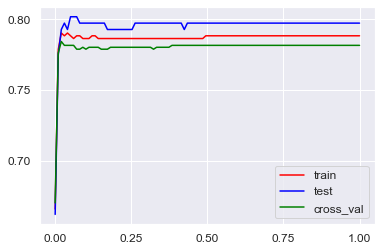

In [29]:
from sklearn.linear_model import LogisticRegression  

tr = []; te = []; cv = []
C = np.linspace(0.001, 1, 100)
for i in C:         # 选择不同的C参数绘制学习曲线
    model = LogisticRegression(C=i)
    lr = model.fit(X_train, Y_train)
    score_tr = lr.score(X_train,Y_train)
    score_te = lr.score(X_test, Y_test)
    score_cv = cross_val_score(lr,scaler_x,y,cv=5).mean()
    tr.append(score_tr)
    te.append(score_te)
    cv.append(score_cv)
print(f"交叉验证的最大得分为:{max(cv)}，最大得分的下标为:{np.argmax(cv)}")
plt.plot(C,tr,color='red',label='train')
plt.plot(C,te,color='blue',label='test')
plt.plot(C,cv,color='green',label='cross_val')
plt.xticks(size=12)
plt.yticks(size=12) 
plt.legend(fontsize=12)
plt.show()

#### 当正则化系数超过0.25之后，模型在三个数据集上的得分差异不明显，所以在后续网格搜索时，可以将C控制在0-0.5之间。

#### 4.2 网格搜索寻找较优参数

In [30]:
'''
利用网格搜索函数寻找一个较优模型，
此处设置C和penalty这两个参数，
其中C是正则化系数，penalty是惩罚函数的形式。
'''
param_grid = {'C': np.linspace(0.001, 0.5, 100),
              'penalty': ['l1','l2']}
lr = LogisticRegression()
grid_search(lr, param_grid)

Best parameters:{'C': 0.026202020202020202, 'penalty': 'l2'}
Best cross-validation score:0.777
Training set score:0.792
Test set score:0.802


#### 4.3 评估搜索到的最优模型

训练集的得分为：0.7883495145631068
测试集的得分为：0.8063063063063063
该模型在测试集上的误分类个数为：43
该模型的混淆矩阵为:
[[136  11]
 [ 32  43]]


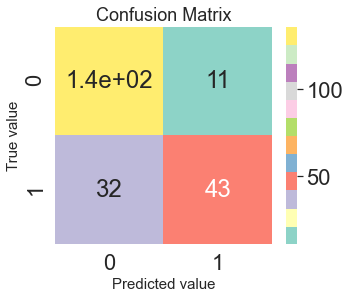

该模型的分类报告为:
              precision    recall  f1-score   support

           0       0.81      0.93      0.86       147
           1       0.80      0.57      0.67        75

    accuracy                           0.81       222
   macro avg       0.80      0.75      0.77       222
weighted avg       0.81      0.81      0.80       222



In [31]:
'''
通过网格搜索得到C=0.0766,penalty=l2时，
交叉验证得分最高，所以在这种参数设置下评估模型的预测效果。
'''
log_reg = LogisticRegression(C=0.0766, penalty='l2')
model_evaluation(log_reg)

#### 分析：网格搜索到的逻辑回归模型为LogisticRegression(C=0.026202020202020202, penalty='l2')，误判个数为43个，在训练集上的得分为0.81，在测试集上的得分为0.8，泛化能力较好。从测试报告中可知，准确率为0.81，预测不患病的f1_score为0.86，预测患病的f1_score为0.67，预测患病的错误率较高。

### 5. K近邻

#### 5.1 学习曲线模拟

#### KNN模型需要调整的是k(n_neighbors)的个数，可以通过绘制训练精度、测试精度和交叉验证精度与不同K值得关系曲线图来找出最合适的K值。

交叉验证的最大得分为:0.8101029601029601，最大得分的参数为:11


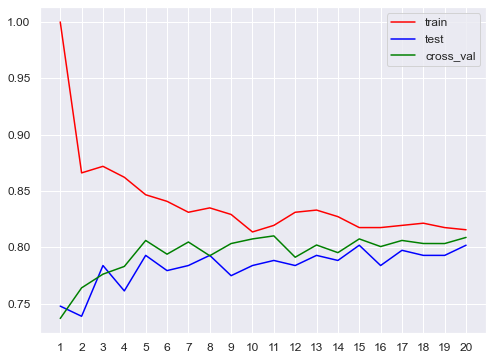

In [32]:
from sklearn.neighbors import KNeighborsClassifier

# 调整模型最重要的参数n_neighbors
tr = []; te = []; cv=[]
for i in range(1,21):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn = knn.fit(X_train, Y_train)
    score_te = knn.score(X_test,Y_test)
    score_tr = knn.score(X_train,Y_train)
    score_cv = cross_val_score(knn,scaler_x,y,cv=5).mean()
    tr.append(score_tr)
    te.append(score_te)
    cv.append(score_cv)
print(f"交叉验证的最大得分为:{max(cv)}，最大得分的参数为:{np.argmax(cv)+1}")
plt.figure(figsize=(8,6))
plt.plot(range(1,21),tr,color='red',label='train')
plt.plot(range(1,21),te,color='blue',label='test')
plt.plot(range(1,21),cv,color='green',label='cross_val')
plt.xticks(range(1,21), size=12)
plt.yticks(size=12)
plt.legend(fontsize=12)
plt.show()

####  随着k的增大，训练精度逐渐下降，后面又开始上升，而测试集和交叉验证集的得分逐渐上升直到变化不大，所以在后续网格搜索中将k设置为1-20。

#### 5.2 网格搜索寻找较优参数

In [33]:
'''
利用网格搜索函数寻找一个较优模型，
此处设置n_neighbors一个参数，代表k个邻居。
'''
param_grid = {'n_neighbors': range(1, 21)}
knn = KNeighborsClassifier()
grid_search(knn, param_grid)

Best parameters:{'n_neighbors': 17}
Best cross-validation score:0.796
Training set score:0.819
Test set score:0.797


#### 5.3 评估搜索到的最优模型

训练集的得分为：0.8194174757281554
测试集的得分为：0.7972972972972973
该模型在测试集上的误分类个数为：45
该模型的混淆矩阵为:
[[136  11]
 [ 34  41]]


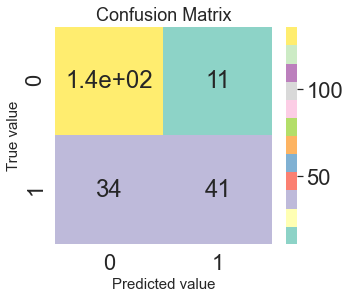

该模型的分类报告为:
              precision    recall  f1-score   support

           0       0.80      0.93      0.86       147
           1       0.79      0.55      0.65        75

    accuracy                           0.80       222
   macro avg       0.79      0.74      0.75       222
weighted avg       0.80      0.80      0.79       222



In [34]:
'''
通过网格搜索到最优参数n_neighbors=17时，
交叉验证得分最高，所以在这种参数设置下评估模型的预测效果。
'''
knn = KNeighborsClassifier(n_neighbors=17)   
model_evaluation(knn)

#### 分析：网格搜索到的k近邻模型为KNeighborsClassifier(n_neighbors=17) ，误判个数为45个，在训练集上的得分为0.8，在测试集上的得分为0.79，泛化能力较好。从测试报告中可知，准确率为0.8，预测不患病的f1_score为0.86，预测患病的f1_score为0.65，预测患病的错误率较高。

### 6. 随机森林

#### 6.1 学习曲线模拟

#### 随机森林模型中的一个重要参数n_estimators表示最大的弱学习器的个数，若n_estimators太小，容易欠拟合，n_estimators太大，计算量会很大，并且n_estimators到一定的数量后，再增大n_estimators获得的模型提升会很小，所以要选择一个适中的数值。

交叉验证的最大得分为:0.8101029601029601，最大得分的参数为:20


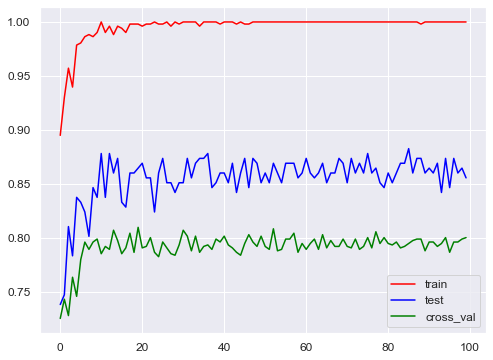

In [35]:
from sklearn.ensemble import RandomForestClassifier   #导入需要的模块

# 调整随机森林模型中基学习器的个数，即n_estimators参数
tr = []; te = []; cv=[]
for i in range(100):
    rfc = RandomForestClassifier(n_estimators=i+1,n_jobs=-1)
    rfc = rfc.fit(X_train, Y_train)
    score_te = rfc.score(X_test,Y_test)
    score_tr = rfc.score(X_train,Y_train)
    score_cv = cross_val_score(rfc,scaler_x,y,cv=5).mean()
    tr.append(score_tr)
    te.append(score_te)
    cv.append(score_cv)
print(f"交叉验证的最大得分为:{max(cv)}，最大得分的参数为:{np.argmax(cv)+1}")
plt.figure(figsize=(8,6))
plt.plot(range(100),tr,color='red',label='train')
plt.plot(range(100),te,color='blue',label='test')
plt.plot(range(100),cv,color='green',label='cross_val')
plt.xticks(size=12)
plt.yticks(size=12)
plt.legend(fontsize=12)
plt.show()

#### 从学习曲线中可以看到，当学习器的个数超过30，训练集得分趋向于1，模型非常容易过拟合，而且交叉验证集得分和测试集的得分变化不是非常大，所以在后续调参时，可以将n_estimators设置在1-50之间。¶

#### 6.2 网格搜索寻找最优参数

In [36]:

'''
利用网格搜索函数寻找一个较优模型，
此处设置n_estimators和max_depth两个参数，
其中n_estimators是最大的弱学习器的个数，max_depth是树的最大深度。
'''
param_grid = {'n_estimators':np.arange(1, 50, 1),
              'max_depth':np.arange(1, 10, 1)}
rfc = RandomForestClassifier()
grid_search(rfc, param_grid)

Best parameters:{'max_depth': 8, 'n_estimators': 24}
Best cross-validation score:0.852
Training set score:0.981
Test set score:0.851


#### 6.3 评估搜索到的最优模型

训练集的得分为：0.996116504854369
测试集的得分为：0.8513513513513513
该模型在测试集上的误分类个数为：33
该模型的混淆矩阵为:
[[135  12]
 [ 21  54]]


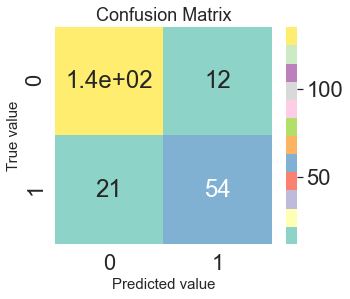

该模型的分类报告为:
              precision    recall  f1-score   support

           0       0.87      0.92      0.89       147
           1       0.82      0.72      0.77        75

    accuracy                           0.85       222
   macro avg       0.84      0.82      0.83       222
weighted avg       0.85      0.85      0.85       222



In [37]:
'''
通过网格搜索得到当n_estimators=36, max_depth=9时，
交叉验证得分最高，所以在这种参数设置下评估模型的预测效果。
'''
rfc = RandomForestClassifier(n_estimators=36, max_depth=9)
model_evaluation(rfc)

#### 分析：网格搜索到的随机森林模型为RandomForestClassifier(n_estimators=39, max_depth=5) ，误判个数为32个，在训练集上的得分为0.857，在测试集上的得分为0.792，泛化能力较好。并从特征重要性条形图中可以看到，随机森林模型中把Glucose(血糖浓度)、BMI指数、Age视为重要，BloodPressure、SkinThickness、Insulin视为较不重要。从测试报告中可知，准确率为0.79，是比较高的，预测不患病的f1_score为0.85，预测患病的f1_score为0.66，预测患病的错误率较高。

### 7. Adaboost

#### 7.1 学习曲线模拟

#### Adaboost也是一种集成模型，它的重要参数也是弱学习器的个数，若n_estimators太小，容易欠拟合，n_estimators太大，计算量会很大，所以要选择一个适中的数值。另一个重要参数时learning_rate（学习率），即每个弱学习器的权重缩减系数，所以需要调整这两个参数来提升模型的性能。

交叉验证的最大得分为:0.8032818532818533，最大得分的下标为:2


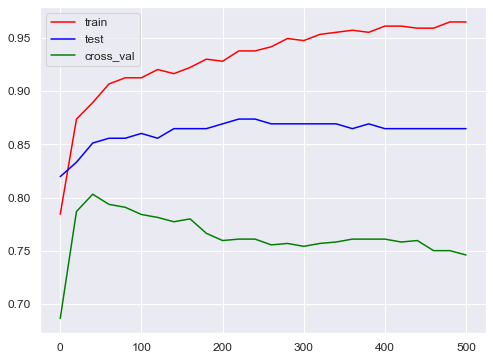

In [38]:
from sklearn.ensemble import AdaBoostClassifier

# 调整Adaboost模型中基学习器的个数，即n_estimators参数
tr = []; te = []; cv=[]
for i in range(0,501,20):
    ada_clf = AdaBoostClassifier(n_estimators=i+1,algorithm="SAMME.R",
                                 learning_rate=0.5,random_state=20)
    ada_clf = ada_clf.fit(X_train, Y_train)
    score_te = ada_clf.score(X_test,Y_test)
    score_tr = ada_clf.score(X_train,Y_train)
    score_cv = cross_val_score(ada_clf,scaler_x,y,cv=5).mean()
    tr.append(score_tr)
    te.append(score_te)
    cv.append(score_cv)
print(f"交叉验证的最大得分为:{max(cv)}，最大得分的下标为:{np.argmax(cv)}")
plt.figure(figsize=(8,6))
plt.plot(range(0,501,20),tr,color='red',label='train')
plt.plot(range(0,501,20),te,color='blue',label='test')
plt.plot(range(0,501,20),cv,color='green',label='cross_val')
plt.xticks(size=12)
plt.yticks(size=12)
plt.legend(fontsize=12)
plt.show()

交叉验证的最大得分为:0.8060305203162346，最大得分的下标为:31


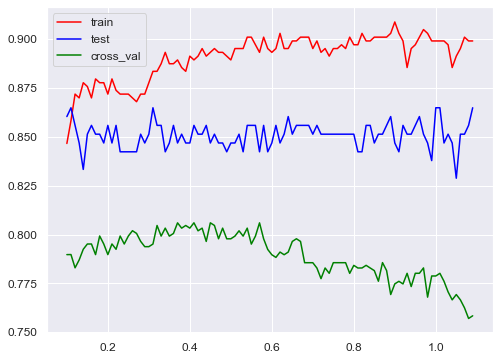

In [39]:
# 调整学习率，即learning_rate参数
tr = []; te = []; cv=[]
list = np.arange(0.1, 1.1, 0.01)
for i in list:
    ada_clf = AdaBoostClassifier(n_estimators=40,algorithm="SAMME.R",
                                 learning_rate=i,random_state=20)
    ada_clf = ada_clf.fit(X_train, Y_train)
    score_te = ada_clf.score(X_test,Y_test)
    score_tr = ada_clf.score(X_train,Y_train)
    score_cv = cross_val_score(ada_clf,scaler_x,y,cv=5).mean()
    tr.append(score_tr)
    te.append(score_te)
    cv.append(score_cv)
print(f"交叉验证的最大得分为:{max(cv)}，最大得分的下标为:{np.argmax(cv)}")
plt.figure(figsize=(8,6))
plt.plot(list,tr,color='red',label='train')
plt.plot(list,te,color='blue',label='test')
plt.plot(list,cv,color='green',label='cross_val')
plt.xticks(size=12)
plt.yticks(size=12)
plt.legend(fontsize=12)
plt.show()

#### 由学习曲线可得，当弱学习器的的个数超过200，模型就会趋于过拟合，在交叉验证集和测试集的得分也会降低，所以后续网格搜索将参数控制在1-200之间即可。而学习率过大的波动比较大，所以设置在0-1之间。

#### 7.2 网格搜索寻找最优参数

In [40]:
'''
利用网格搜索函数寻找一个较优模型，
此处设置n_estimators和learning_rate两个参数，
其中n_estimators是最大的弱学习器的个数，learning_rate是每个弱学习器的权重缩减系数。
'''
param_grid = {'n_estimators': range(1, 201, 20),
              'learning_rate': np.arange(0.1, 1.1, 0.1)}
ada = AdaBoostClassifier()
grid_search(ada, param_grid)

Best parameters:{'learning_rate': 0.7000000000000001, 'n_estimators': 41}
Best cross-validation score:0.843
Training set score:0.895
Test set score:0.851


#### 7.3 评估搜索到的最优模型

训练集的得分为：0.8951456310679612
测试集的得分为：0.8513513513513513
该模型在测试集上的误分类个数为：33
该模型的混淆矩阵为:
[[135  12]
 [ 21  54]]


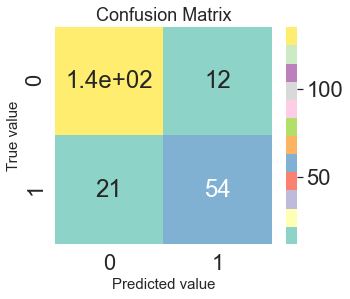

该模型的分类报告为:
              precision    recall  f1-score   support

           0       0.87      0.92      0.89       147
           1       0.82      0.72      0.77        75

    accuracy                           0.85       222
   macro avg       0.84      0.82      0.83       222
weighted avg       0.85      0.85      0.85       222



In [41]:
'''
由网格搜索可得，当n_estimators=41，learning_rate=0.7，max_depth=1时，
交叉验证集的得分最高，所以在这种参数设置下评估模型的预测效果。
'''
ada = AdaBoostClassifier(n_estimators=41,algorithm="SAMME.R",
                         learning_rate=0.7,random_state=0
            )
model_evaluation(ada)

#### 分析：网格搜索到的Adaboost模型为AdaBoostClassifier(n_estimators=41,algorithm="SAMME.R",learning_rate=0.7,random_state=0)，误判个数为33个，在训练集上的得分为0.83，在测试集上的得分为0.85，泛化能力较好。并且Adaboost将Glucose、BMI、DiabeteaPedigreeFUnction、Age都视为重要，而将SkinThickness和Insulin的特征重要性视作0，相当于进行了特征选择。再从测试报告中可知，准确率为0.85，预测不患病的f1_score为0.89，预测患病的f1_score为0.77，预测准确率是相对较高的。¶

### 8. 梯度提升树

#### 8.1 学习曲线模拟

#### GBDT也是一种集成方法，参数n_estimators是弱学习器的最大迭代次数，也可以说是最大的弱学习器的个数，n_estimators太小，容易欠拟合，n_estimators太大，又容易过拟合。参数learning_rate是每个弱学习器的权重缩减系数，也称作步长。

交叉验证的最大得分为:0.8047251332965619，最大得分的下标为:4


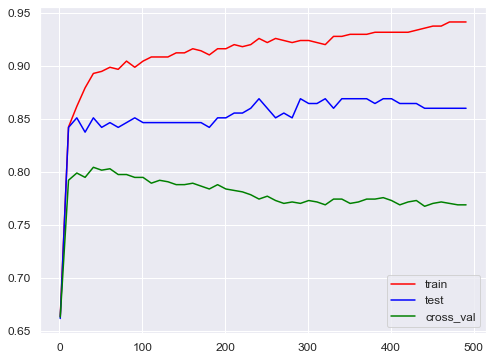

In [42]:
from sklearn.ensemble import GradientBoostingClassifier

# 变换梯度提升树中弱学习器的个数，即n_estimators参数
tr = []; te = []; cv=[]
for i in range(1,500,10):
    gbdt = GradientBoostingClassifier(n_estimators=i, learning_rate=0.3,
                                      max_depth=1, random_state=0)
    gbdt = gbdt.fit(X_train, Y_train)
    score_te = gbdt.score(X_test,Y_test)
    score_tr = gbdt.score(X_train,Y_train)
    score_cv = cross_val_score(gbdt,scaler_x,y,cv=5).mean()
    tr.append(score_tr)
    te.append(score_te)
    cv.append(score_cv)
print(f"交叉验证的最大得分为:{max(cv)}，最大得分的下标为:{np.argmax(cv)}")
plt.figure(figsize=(8,6))
plt.plot(range(1,500,10),tr,color='red',label='train')
plt.plot(range(1,500,10),te,color='blue',label='test')
plt.plot(range(1,500,10),cv,color='green',label='cross_val')
plt.xticks(size=12)
plt.yticks(size=12)
plt.legend(fontsize=12)
plt.show()

交叉验证的最大得分为:0.8019305019305019，最大得分的下标为:0


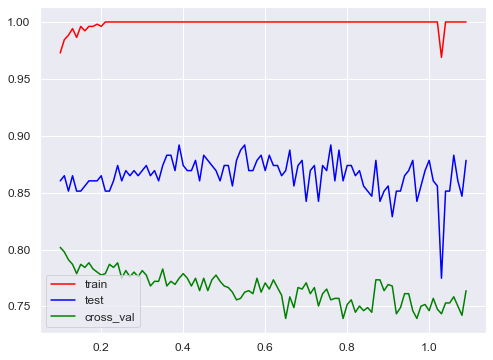

In [43]:
# 变换梯度提升树中的学习率参数

tr = []; te = []; cv=[]
list = np.arange(0.1, 1.1, 0.01)
for i in list:
    gbdt = GradientBoostingClassifier(learning_rate=i, random_state=0)
    gbdt = gbdt.fit(X_train, Y_train)
    score_te = gbdt.score(X_test,Y_test)
    score_tr = gbdt.score(X_train,Y_train)
    score_cv = cross_val_score(gbdt,scaler_x,y,cv=5).mean()
    tr.append(score_tr)
    te.append(score_te)
    cv.append(score_cv)
print(f"交叉验证的最大得分为:{max(cv)}，最大得分的下标为:{np.argmax(cv)}")
plt.figure(figsize=(8,6))
plt.plot(list,tr,color='red',label='train')
plt.plot(list,te,color='blue',label='test')
plt.plot(list,cv,color='green',label='cross_val')
plt.xticks(size=12)
plt.yticks(size=12)
plt.legend(fontsize=12)
plt.show()

#### 从学习曲线中可以看到，当弱学习器的个数超过300，模型可能会趋于过拟合，而且当超过400时，模型在测试集上的得分略有下降，所以可以将该参数控制在1-300之间。当学习率超过0.4时，模型在训练集上趋于过拟合，交叉验证集的得分开始下降，所以在后续搜索时可以将模型控制在0-0.4之间。¶

#### 8.2 网格搜索寻找最优参数

In [44]:
'''
利用网格搜索函数寻找一个较优模型，
此处设置n_estimators、learning_rate、max_depth三个参数，
其中n_estimators是最大的弱学习器的个数，
learning_rate是每个弱学习器的权重缩减系数，max_depth是树的最大深度。
'''
param_grid = {'n_estimators':np.arange(1,300,50),
              'learning_rate':np.linspace(0,0.4,5),
              'max_depth':np.arange(1, 10, 1)}
gbdt = GradientBoostingClassifier()
grid_search(gbdt, param_grid)

Best parameters:{'learning_rate': 0.2, 'max_depth': 6, 'n_estimators': 151}
Best cross-validation score:0.852
Training set score:1.000
Test set score:0.874


#### 8.3 评估搜索到的最优模型

训练集的得分为：1.0
测试集的得分为：0.8648648648648649
该模型在测试集上的误分类个数为：30
该模型的混淆矩阵为:
[[135  12]
 [ 18  57]]


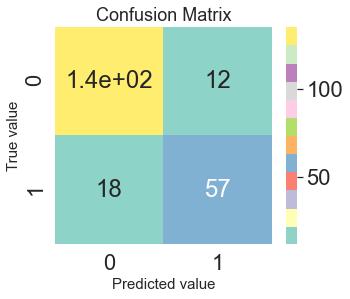

该模型的分类报告为:
              precision    recall  f1-score   support

           0       0.88      0.92      0.90       147
           1       0.83      0.76      0.79        75

    accuracy                           0.86       222
   macro avg       0.85      0.84      0.85       222
weighted avg       0.86      0.86      0.86       222



In [45]:
'''
由网格搜索可得，当n_estimators=151，learning_rate=0.2，max_depth=6时，
交叉验证集的得分最高，所以在这种参数设置下评估模型的预测效果。
'''
gbdt = GradientBoostingClassifier(n_estimators=151, learning_rate=0.2,
                                 max_depth=6, random_state=0)
model_evaluation(gbdt)

#### 分析：网格搜索到的梯度集成模型为GradientBoostingClassifier(n_estimators=151, learning_rate=0.2, max_depth=6, random_state=0)，误判个数为30个，在训练集上的得分为0.85，在测试集上的得分为0.86，泛化能力是目前最好的。而且该模型将Glucose的特征重要性视为最大，其次是BMI，SkinThickness的重要性最低。另外从测试报告中可知，准确率为0.86，预测不患病的f1_score为0.9，预测患病的f1_score为0.79，预测是否患病的准确率是最高的。

### 9. 神经网络

#### 9.1 学习曲线模拟

#### 多层感知器的一个重要参数alpha是正则化参数， 用于权重更新；另外模型分类还需要估计网络的复杂度，即层数和每层的神经元个数，需要调节hidden_layer_size,可以先画出1-6个隐层的学习曲线，然后缩小调参范围逐步增加找到合适的值。

交叉验证的最大得分为:0.84002574002574，最大得分的下标为:0


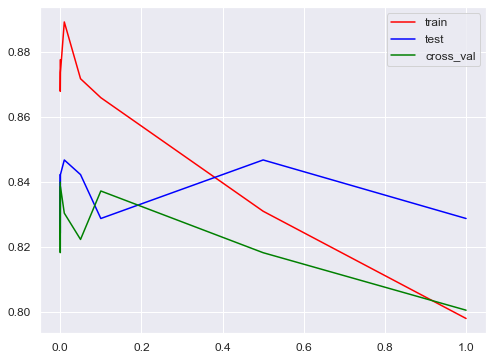

In [46]:
from sklearn.neural_network import MLPClassifier

# 调整神经网络模型的alpha参数
tr = []; te = []; cv=[]
list = [1e-6, 0.00001, 0.00005, 0.0001, 0.0005, 0.01, 0.05, 0.1, 0.5, 1]
for i in list:
    mlp = MLPClassifier(alpha=i, hidden_layer_sizes=(15,), batch_size=30, solver='adam')
    mlp = mlp.fit(X_train, Y_train)
    score_te = mlp.score(X_test,Y_test)
    score_tr = mlp.score(X_train,Y_train)
    score_cv = cross_val_score(mlp,scaler_x,y,cv=5).mean()
    tr.append(score_tr)
    te.append(score_te)
    cv.append(score_cv)
print(f"交叉验证的最大得分为:{max(cv)}，最大得分的下标为:{np.argmax(cv)}")
plt.figure(figsize=(8,6))
plt.plot(list,tr,color='red',label='train')
plt.plot(list,te,color='blue',label='test')
plt.plot(list,cv,color='green',label='cross_val')
plt.xticks(size=12)
plt.yticks(size=12)
plt.legend(fontsize=12,loc="best")
plt.show()

交叉验证的最大得分为:0.8359624931053503，最大得分的下标为:0


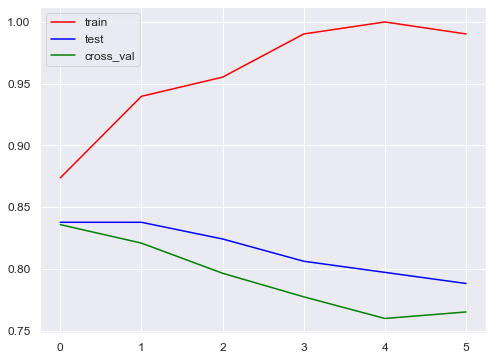

In [47]:
# 调整神经网络的层数和神经元个数
tr = []; te = []; cv=[]
layers = [(15,),(15,15),(15,15,15),(15,15,15,15),(15,15,15,15,15),(15,15,15,15,15,15)]
for i in layers:
    mlp = MLPClassifier(alpha=0.0005, hidden_layer_sizes=i, batch_size=30, solver='adam')
    mlp = mlp.fit(X_train, Y_train)
    score_te = mlp.score(X_test,Y_test)
    score_tr = mlp.score(X_train,Y_train)
    score_cv = cross_val_score(mlp,scaler_x,y,cv=5).mean()
    tr.append(score_tr)
    te.append(score_te)
    cv.append(score_cv)
print(f"交叉验证的最大得分为:{max(cv)}，最大得分的下标为:{np.argmax(cv)}")
plt.figure(figsize=(8,6))
plt.plot(range(6),tr,color='red',label='train')
plt.plot(range(6),te,color='blue',label='test')
plt.plot(range(6),cv,color='green',label='cross_val')
plt.xticks(size=12)
plt.yticks(size=12)
plt.legend(fontsize=12,loc="best")
plt.show()

交叉验证的最大得分为:0.8359624931053503，最大得分的下标为:6


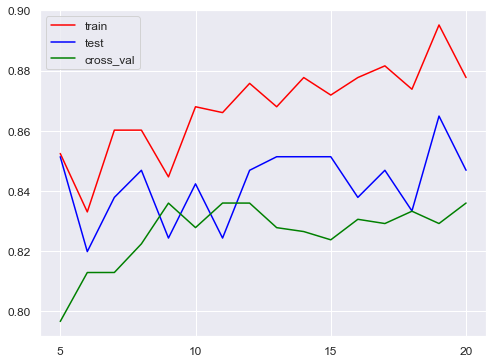

In [48]:
# 单层神经网络效果较好，接着调整隐藏层中神经元个数
tr = []; te = []; cv=[]

for i in range(5, 21):
    mlp = MLPClassifier(alpha=0.0005, hidden_layer_sizes=(i,), batch_size=30, solver='adam')
    mlp = mlp.fit(X_train, Y_train)
    score_te = mlp.score(X_test,Y_test)
    score_tr = mlp.score(X_train,Y_train)
    score_cv = cross_val_score(mlp,scaler_x,y,cv=5).mean()
    tr.append(score_tr)
    te.append(score_te)
    cv.append(score_cv)
print(f"交叉验证的最大得分为:{max(cv)}，最大得分的下标为:{np.argmax(cv)}")
plt.figure(figsize=(8,6))
plt.plot(range(5, 21),tr,color='red',label='train')
plt.plot(range(5, 21),te,color='blue',label='test')
plt.plot(range(5, 21),cv,color='green',label='cross_val')
plt.xticks(size=12)
plt.yticks(size=12)
plt.legend(fontsize=12,loc="best")
plt.show()

#### 9.2 网格搜索寻找最优参数

In [51]:
'''
利用网格搜索函数寻找一个较优模型，
此处设置alpha、hidden_layer_sizes、batch_size三个参数，
其中alpha是正则化系数，hidden_layer_sizes是隐藏层的层数和神经元个数，
batch_size是随机优化器的minibatch的大小。
'''
param_grid = {'alpha':[0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1],
              'hidden_layer_sizes':[(17,),(17,17)],
              'batch_size':[10,20,30,40,50,60]}
mlp = MLPClassifier()
grid_search(mlp, param_grid)

Best parameters:{'alpha': 0.0005, 'batch_size': 20, 'hidden_layer_sizes': (17,)}
Best cross-validation score:0.833
Training set score:0.889
Test set score:0.842


#### 9.3 评估搜索到的最优模型

训练集的得分为：0.8621359223300971
测试集的得分为：0.8378378378378378
该模型在测试集上的误分类个数为：36
该模型的混淆矩阵为:
[[138   9]
 [ 27  48]]


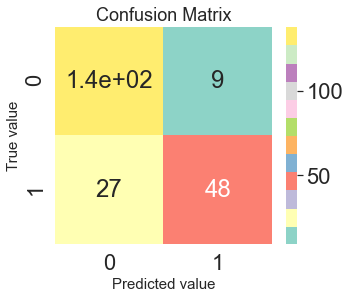

该模型的分类报告为:
              precision    recall  f1-score   support

           0       0.84      0.94      0.88       147
           1       0.84      0.64      0.73        75

    accuracy                           0.84       222
   macro avg       0.84      0.79      0.81       222
weighted avg       0.84      0.84      0.83       222



In [53]:
'''
由网格搜索可得，当alpha=0.0005,hidden_layer_sizes=(17,),batch_size=20时，
交叉验证集的得分最高，所以在这种参数设置下评估模型的预测效果。
'''
mlp = MLPClassifier(alpha=0.1, hidden_layer_sizes=(17,),
                    batch_size=40, solver='adam')
model_evaluation(mlp)

#### 分析：网格搜索到的神经网络模型为MLPClassifier(alpha=0.0005, hidden_layer_sizes=(17,),batch_size=20, solver='adam')，误判个数为36个，在训练集上的得分为0.81，在测试集上的得分为0.83，泛化能力最好。从测试报告中可知，准确率为0.84，预测不患病的f1_score为0.88，预测患病的f1_score为0.73，准确率最高。神经网络一般可以战胜其他方法，但是一般需要更多的训练时间。